In [ ]:
import pandas as pd
import re

#Import data

In [ ]:
id='1Fh9bUrCMhjnFVugUShHICHWcPbUKqMWBSQ7lZ7GPxZc'
name="let-mi_train_part"
url = f"https://docs.google.com/spreadsheets/d/{id}/gviz/tq?tqx=out:csv&sheet={name}"

In [ ]:
df = pd.read_csv(url)
df.category.unique()

array(['discredit', 'none', 'damning', 'stereotyping & objectification',
       'threat of violence', 'dominance', 'derailing',
       'sexual harassment'], dtype=object)

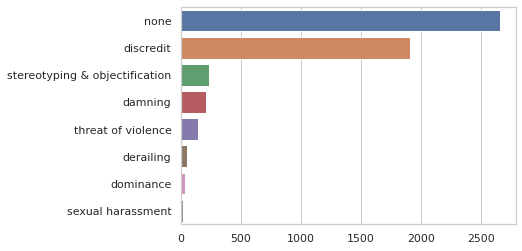

In [ ]:
df = pd.read_csv(url)
values=df['category'].value_counts()
list(values.index)
list(values.values)
#plt.bar(,,data=values)
sns.set(style="whitegrid")
ax = sns.barplot(x=list(values.values), y=list(values.index))


In [ ]:
df = pd.read_csv(url)
df=df.drop(['misogyny', 'target'], axis=1)
df.head()

,text,category
0,@AhmadMoussaly @DimaSadek اي نحن ما منقبلها صر...,discredit
1,@berrynawal نوال شو قصتك كل يوم بتاكلي قتله شو...,none
2,@DimaSadek انشالله بيقبر قلبك عن قريب ...يافهي...,damning
3,@DimaSadek @LBCI_NEWS @JeanFeghali يسلم لسانك ...,none
4,@RammalNaima @DimaSadek من بجيب الحشيش عبيروت ...,none


#Data cleaning


In [ ]:
import string
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|\!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)

    #remove retweet 
    tweet = re.sub('RT',' ',tweet)

    
    #normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    #remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    tweet=emoji_pattern.sub(r'', tweet)
    
    return tweet

In [ ]:
df["text"] = df['text'].apply(lambda x: processPost(x))

In [ ]:
#NOTE i tries tweet preprocessing but it does not suppport arabic!

#Getting Tokenize the tweet text

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df["text_normal_tokens"] = df["text"].apply(tokenizer.tokenize)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#remove stop words
stopwords_list = stopwords.words('arabic')
newStopWords = ['انت','يعني','معك',"ال","كلنا","انو","الا","او","اذا","انا","اي","انتي","علي","انك","يلا","عنا","انتو","لو","وانت","كنت"," ال","نوال","نانسي","يمني","هيدي","الي","و","ع"]
stopwords_list.extend(newStopWords)
# listToStr = ' '.join([str(elem) for elem in stopwords_list]) 
# listToStr

In [ ]:
df["text_normal_tokens"]=df["text_normal_tokens"].apply(lambda x: [item for item in x if item not in stopwords_list])
df["sentence"]=[' '.join(map(str, l)) for l in df['text_normal_tokens']]
df.head()

,text,category,text_normal_tokens,sentence
0,اي نحن ما منقبلها صرمايه باجرنا مبروكع راسكم,discredit,"[منقبلها, صرمايه, باجرنا, مبروكع, راسكم]",منقبلها صرمايه باجرنا مبروكع راسكم
1,نوال شو قصتك كل يوم بتاكلي قتله شو صاير معك ش...,none,"[شو, قصتك, يوم, بتاكلي, قتله, شو, صاير, شي, ال...",شو قصتك يوم بتاكلي قتله شو صاير شي اليوم طمنين...
2,انشاله بيقبر قلبك عن قريب يافهيمه عصرك,damning,"[انشاله, بيقبر, قلبك, قريب, يافهيمه, عصرك]",انشاله بيقبر قلبك قريب يافهيمه عصرك
3,يسلم لسانك من مصر يا ديما نحن معك,none,"[يسلم, لسانك, مصر, ديما]",يسلم لسانك مصر ديما
4,من بجيب الحشيش عبيروت بعلبك يعني انتو,none,"[بجيب, الحشيش, عبيروت, بعلبك]",بجيب الحشيش عبيروت بعلبك


#Data visulaization 

In [ ]:
 !pip install arabic-reshaper
 !pip install python-bidi

In [ ]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoKufiArabic-hinted.zip"
!unzip -o "NotoKufiArabic-hinted.zip"

--2021-07-18 07:35:30--  https://noto-website-2.storage.googleapis.com/pkgs/NotoKufiArabic-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.253.62.128, 2607:f8b0:4004:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82163 (80K) [application/zip]
Saving to: ‘NotoKufiArabic-hinted.zip.2’

NotoKufiArabic-hint 100%[===================>]  80.24K  --.-KB/s    in 0.001s  

2021-07-18 07:35:30 (96.6 MB/s) - ‘NotoKufiArabic-hinted.zip.2’ saved [82163/82163]

Archive:  NotoKufiArabic-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoKufiArabic-Bold.ttf  
  inflating: NotoKufiArabic-Regular.ttf  
  inflating: README                  


In [ ]:
!mv "NotoKufiArabic-Regular.ttf" "/content/"

mv: 'NotoKufiArabic-Regular.ttf' and '/content/NotoKufiArabic-Regular.ttf' are the same file


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [ ]:
def plot_cloud(dataframe):
    # Set figure size
    wordcloud= WordCloud(font_path="/content/NotoKufiArabic-Regular.ttf",background_color='white',max_words=60).generate(text_arabic_preparation(dataframe))
    plt.figure(figsize=(20, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plt.imshow(wordcloud)
    plt.title("words frequency",fontsize=36)
    plt.axis("off")
    plt.show()


In [ ]:
def text_arabic_preparation(dataframe):
  text=dataframe.to_string()
  q=arabic_reshaper.reshape(text)
  text = get_display(q)
  return text

#plot all words cloud


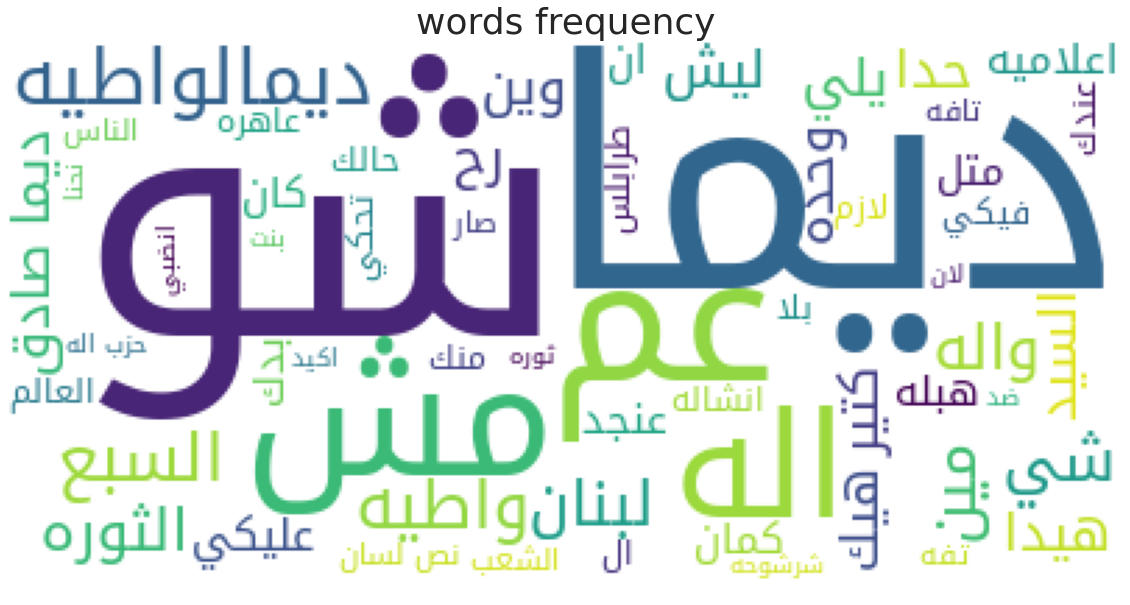

In [ ]:
plot_cloud(df["sentence"])

#plot bad category word cloud

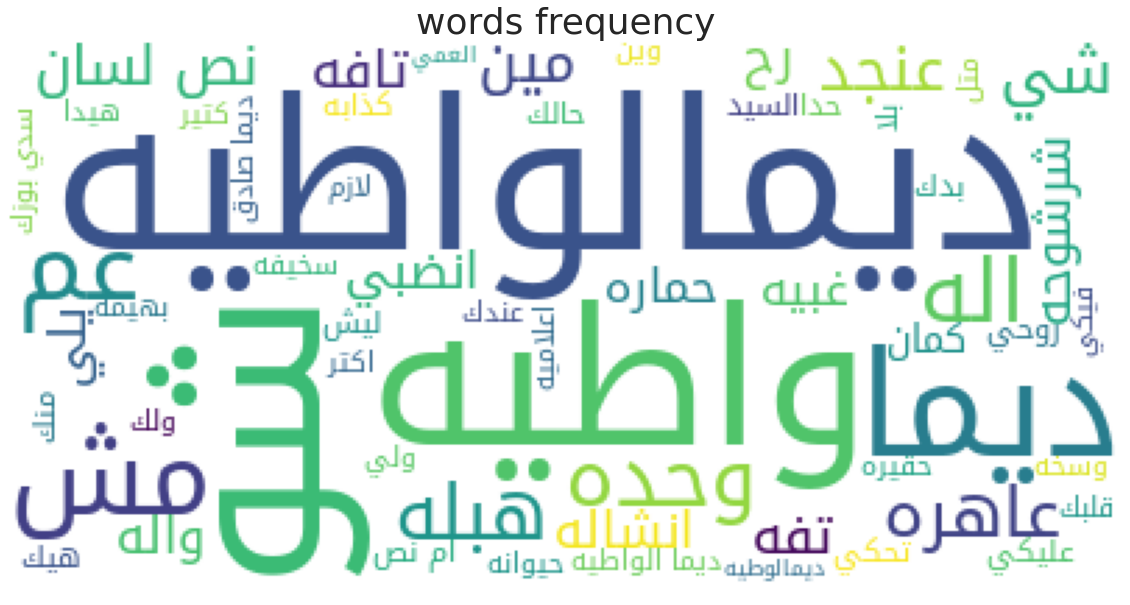

In [ ]:
plot_cloud(df['sentence'][df["category"]!="none"])

#Barplot 

In [ ]:
dfe_bad=df["text_normal_tokens"][df["category"]!="none"]
print(dfe_bad.head())
dfe =dfe_bad.explode().to_frame().reset_index(drop=True)
dfg = dfe.groupby('text_normal_tokens').text_normal_tokens.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(30).reset_index(drop=True)


0             [منقبلها, صرمايه, باجرنا, مبروكع, راسكم]
2           [انشاله, بيقبر, قلبك, قريب, يافهيمه, عصرك]
7    [بكل, تواضع, سفيه, منحطه, عديمه, المبدا, ويجوز...
8                                 [ضبي, لسانك, احسنلك]
9    [حماره, صهيونيه, عاهره, بفضلهم, خضن, تكفيري, ت...
Name: text_normal_tokens, dtype: object


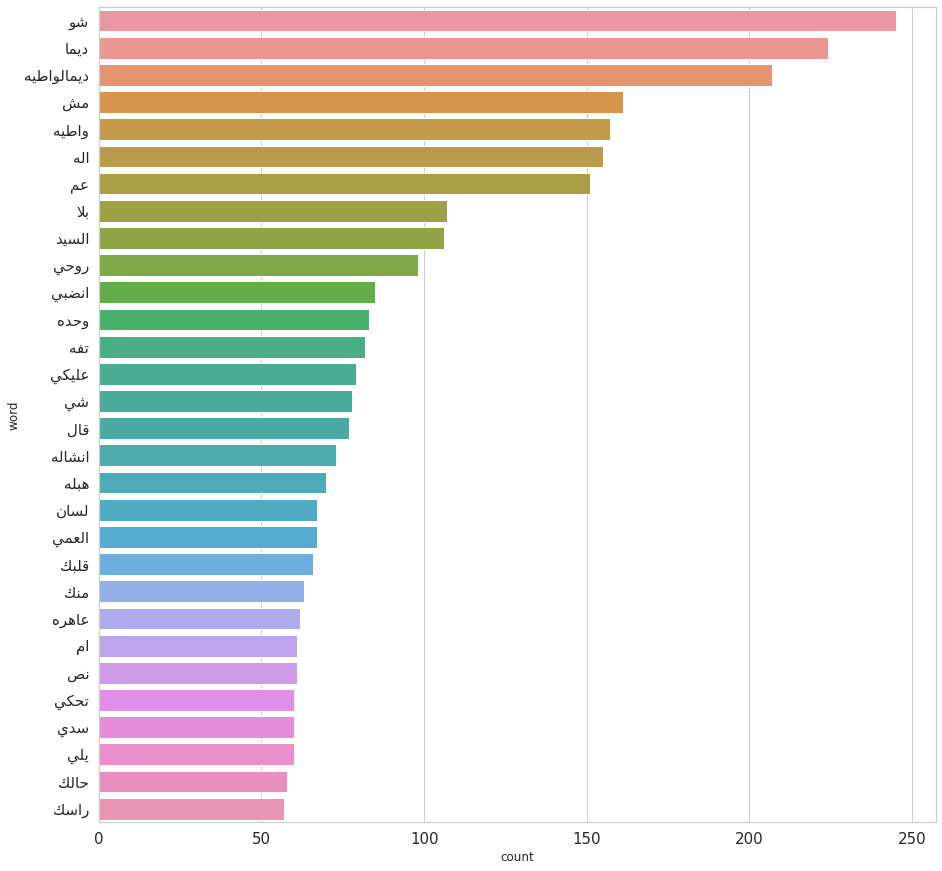

In [ ]:
dfdict=dfg.set_index('text_normal_tokens')['count'].to_dict()
res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in dfdict.items()}
df_final = pd.DataFrame(res2.items(), columns=['word', 'count'])
plt.figure(figsize=(15,15))
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="word", data=df_final)
ax.tick_params(labelsize=15)

<BarContainer object of 2 artists>

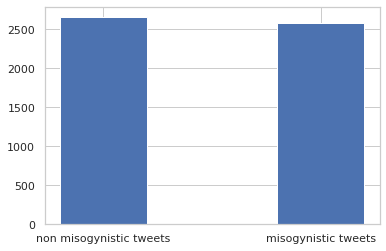

In [ ]:
values=[df["category"][df['category']=="none"].count(),df["category"][df['category']!="none"].count()]
label=["non misogynistic tweets","misogynistic tweets"]
import matplotlib.pyplot as plt

plt.bar(label,values,width=0.40)


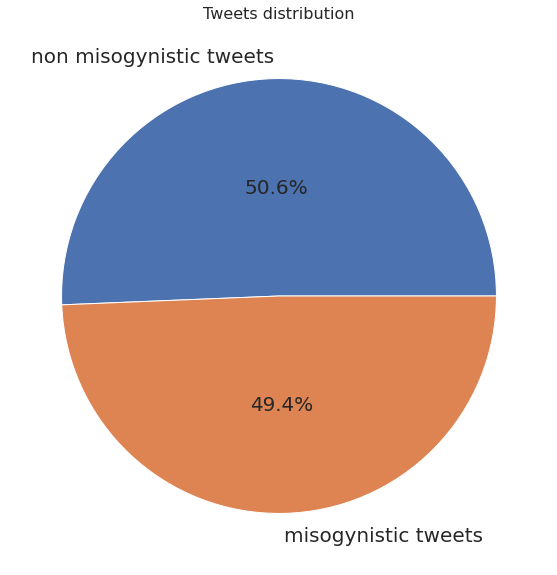

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(x=values, autopct="%.1f%%", labels=label, pctdistance=0.5,textprops={"fontsize":20})
plt.title("Tweets distribution", fontsize=16);
